In [10]:
import pandas as pd
import numpy
import datetime as dt
from pathlib import Path
from Ratio import sharpe_rate
from Ratio import beta
from Ratio import MCSimulation
import hvplot.pandas

In [11]:
price_df = pd.read_csv("Data/solona.csv")
price_df.drop(columns = ['Unnamed: 0'],inplace=True)
price_df['Time'] = price_df['Time'] / 1000 -1000
price_df['Time'] = pd.to_datetime(price_df['Time'], unit='s').apply(lambda x: x.strftime('%Y-%m-%d'))
price_df.set_index('Time', inplace=True)
price_df.columns = ['close']
col = pd.MultiIndex.from_product([['solana'],price_df.columns])
price_df.columns = col
price_df

,solana
,close
Time,
2020-04-10,0.957606
2020-04-11,0.784711
2020-04-12,0.875994
2020-04-13,0.786712
2020-04-14,0.666673
...,...
2022-04-05,126.605680
2022-04-06,112.529026


In [12]:
price_df2 = pd.read_csv("Data/tron.csv")
price_df2.drop(columns = ['Unnamed: 0'],inplace=True)
price_df2['Time'] = price_df2['Time'] / 1000 -1000
price_df2['Time'] = pd.to_datetime(price_df2['Time'], unit='s').apply(lambda x: x.strftime('%Y-%m-%d'))
price_df2.set_index('Time', inplace=True)
price_df.columns = ['close']
col = pd.MultiIndex.from_product([['tron'],price_df.columns])
price_df.columns = col
price_df2

,Tron Price
Time,
2020-04-09,0.013435
2020-04-10,0.012504
2020-04-11,0.012500
2020-04-12,0.012708
2020-04-13,0.012576
...,...
2022-04-05,0.069441
2022-04-06,0.063205
2022-04-07,0.064453


In [13]:
price_df1 = pd.read_csv("Data/cron.csv")
price_df1.drop(columns = ['Unnamed: 0'],inplace=True)
price_df1['Time'] = price_df1['Time'] / 1000 -1000
price_df1['Time'] = pd.to_datetime(price_df1['Time'], unit='s').apply(lambda x: x.strftime('%Y-%m-%d'))
price_df1.set_index('Time', inplace=True)
price_df1.columns = ['close']
col1 = pd.MultiIndex.from_product([['avax'],price_df1.columns])
price_df1.columns = col1
price_df1

,avax
,close
Time,
2020-04-09,0.053171
2020-04-10,0.049563
2020-04-11,0.050024
2020-04-12,0.050062
2020-04-13,0.049767
...,...
2022-04-05,0.471989
2022-04-06,0.440632


In [18]:
total_df = price_df.merge(price_df1,how='left', left_index=True, right_index=True)
total_df.dropna(inplace=True)
total_df

,solana,avax
,close,close
Time,,
2020-04-10,0.957606,0.049563
2020-04-11,0.784711,0.050024
2020-04-12,0.875994,0.050062
2020-04-13,0.786712,0.049767
2020-04-14,0.666673,0.050093
...,...,...
2022-04-05,126.605680,0.471989
2022-04-06,112.529026,0.440632


In [19]:
MC_thrityyear = MCSimulation(
    portfolio_data = total_df,
    weights = [1,0],
    num_simulation = 500,
    num_trading_days = 365*10
)

In [20]:
MC_thrityyear.portfolio_data.head()

solana                   avax             
               close daily_return     close daily_return
Time                                                    
2020-04-10  0.957606          NaN  0.049563          NaN
2020-04-11  0.784711    -0.180549  0.050024     0.009309
2020-04-12  0.875994     0.116327  0.050062     0.000754
2020-04-13  0.786712    -0.101921  0.049767    -0.005885
2020-04-14  0.666673    -0.152583  0.050093     0.006546

In [21]:
MC_thrityyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Jeff\Desktop\git\Classwork\Ratio.py:153: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,9.490844e-01,1.066751e+00,0.925745,0.971040,9.159673e-01,9.713569e-01,9.703840e-01,1.158660e+00,1.106793e+00,9.584917e-01,...,9.328128e-01,1.167008e+00,9.306286e-01,8.564839e-01,1.144167e+00,9.473113e-01,1.061703e+00,1.087475e+00,9.155451e-01,1.024667e+00
2,8.414694e-01,1.064245e+00,0.798197,1.114321,8.888843e-01,1.049570e+00,1.012859e+00,1.081185e+00,1.032371e+00,9.691815e-01,...,8.457106e-01,1.087396e+00,9.003935e-01,9.353044e-01,1.064011e+00,1.004915e+00,9.886942e-01,1.034341e+00,9.239286e-01,1.112316e+00
3,7.713060e-01,1.075447e+00,0.741021,1.277497,1.118084e+00,1.111344e+00,1.050472e+00,9.079488e-01,9.868493e-01,9.525867e-01,...,8.785389e-01,1.150033e+00,8.984674e-01,9.594893e-01,1.046976e+00,1.038600e+00,9.698255e-01,1.102074e+00,9.666614e-01,1.006576e+00
4,6.735232e-01,1.008599e+00,0.763697,1.256217,1.192755e+00,1.292805e+00,1.234245e+00,9.882679e-01,9.061023e-01,8.893468e-01,...,7.913524e-01,1.314251e+00,9.186951e-01,8.178360e-01,1.139331e+00,1.076569e+00,1.071955e+00,1.139663e+00,9.655204e-01,9.607883e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3646,3.344255e+15,2.850057e+09,90046.060608,216832.136619,9.373893e+09,7.276874e+13,1.281902e+12,4.641674e+10,3.039610e+08,1.664493e+10,...,2.306846e+10,2.186276e+09,1.733834e+11,3.862952e+09,7.416198e+09,1.472755e+06,1.332067e+07,1.170289e+08,2.961524e+09,4.864192e+11
3647,3.744758e+15,2.885096e+09,91725.398240,206130.068681,8.593894e+09,8.331815e+13,1.275545e+12,4.260880e+10,3.330624e+08,1.722987e+10,...,2.272505e+10,2.240097e+09,1.516108e+11,4.433058e+09,7.182907e+09,1.411709e+06,1.368146e+07,1.250272e+08,2.668765e+09,5.163811e+11
3648,3.810122e+15,2.946408e+09,93533.848763,197216.249309,9.532170e+09,6.760547e+13,1.314243e+12,4.625185e+10,3.295204e+08,1.764785e+10,...,2.353984e+10,1.969991e+09,1.593968e+11,4.827975e+09,6.609590e+09,1.279070e+06,1.419340e+07,1.203936e+08,2.462155e+09,5.007055e+11
3649,4.142982e+15,3.167339e+09,96693.440578,204163.143412,1.023016e+10,7.386006e+13,1.339236e+12,4.710630e+10,3.414416e+08,1.752271e+10,...,2.252022e+10,2.086525e+09,1.290795e+11,4.293166e+09,5.776407e+09,1.160026e+06,1.283952e+07,1.224619e+08,2.374811e+09,5.471763e+11


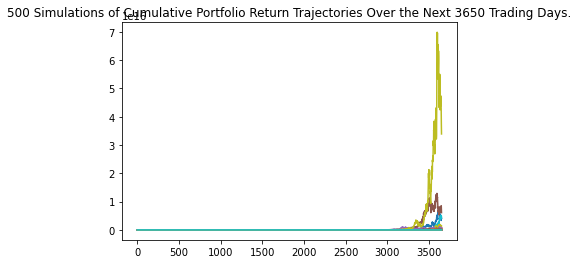

In [22]:
line_plot = MC_thrityyear.plot_simulation()
line_plot.get_figure().savefig("MC_thrityyear_sim_plot.png", bbox_inches="tight")

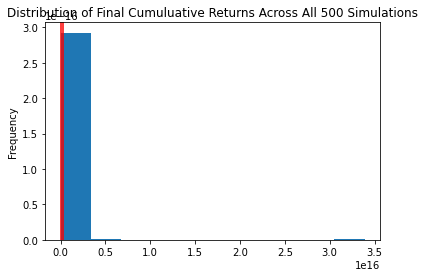

In [23]:
dist_plot = MC_thrityyear.plot_distribution()
dist_plot.get_figure().savefig('MC_thrityyear_dist_plot.png',bbox_inches='tight')

In [24]:
tbl = MC_thrityyear.summarize_cumulative_return()
tbl

count           5.000000e+02
mean            1.110369e+14
std             1.565008e+15
min             6.168463e+03
25%             6.535032e+08
50%             1.335724e+10
75%             4.139454e+11
max             3.392756e+16
95% CI Lower    1.272842e+06
95% CI Upper    2.283612e+14
Name: 3650, dtype: float64

In [25]:
initial_investment = 200
ci_lower = round(tbl[8]*200,2)
ci_upper = round(tbl[9]*200,2)
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $200 in the portfolio over the next 30 years will end within in the range of $254568427.95 and $4.567223955298918e+16
